In [155]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Carregar e visualizar os dados

In [156]:
# Carrear os dados - Regressão
df = pd.read_csv('datasets/dataset_colesterol.csv')

In [157]:
df.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [158]:
# Ajustar o df
df.drop('Id', axis=1, inplace=True)

# Tratar valores ausentes
df.fillna(df.mean(), inplace=True)

# Aplicar One Hot Encoding nas variáveis categóricas
df = pd.get_dummies(df, columns=["Grupo Sanguíneo", "Fumante", "Nível de Atividade"])

/var/folders/zf/qgcqtp9175x9pvmkt42dm1sc0000gn/T/ipykernel_72803/659878535.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [159]:
# DF atualizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   float64
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   float64
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(4), uint

# Calcular PPS - Regressão

In [160]:
# Calcular PPS entre as variáveis
pps_matrix_reg = pps.matrix(df)
pps_matrix_reg

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Idade,Idade,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Idade,Peso,0.000000,regression,True,mean absolute error,16.951690,17.784222,DecisionTreeRegressor()
2,Idade,Altura,0.000000,regression,True,mean absolute error,7.670331,7.858274,DecisionTreeRegressor()
3,Idade,Colesterol,0.000000,regression,True,mean absolute error,40.172500,42.075513,DecisionTreeRegressor()
4,Idade,Grupo Sanguíneo_A,0.000000,regression,True,mean absolute error,0.266000,0.390041,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,Nível de Atividade_Moderado,Fumante_Não,0.000000,regression,True,mean absolute error,0.369000,0.465173,DecisionTreeRegressor()
165,Nível de Atividade_Moderado,Fumante_Sim,0.000000,regression,True,mean absolute error,0.366000,0.463710,DecisionTreeRegressor()
166,Nível de Atividade_Moderado,Nível de Atividade_Alto,0.000000,regression,True,mean absolute error,0.272000,0.333439,DecisionTreeRegressor()
167,Nível de Atividade_Moderado,Nível de Atividade_Baixo,0.213158,regression,True,mean absolute error,0.426000,0.335195,DecisionTreeRegressor()


In [161]:
# Ajustar a matriz para fazer o plot
pps_matrix_reg_pivot = pps_matrix_reg[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
pps_matrix_reg_pivot

x,Altura,Colesterol,Fumante_Não,Fumante_Sim,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Idade,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado,Peso
y,,,,,,,,,,,,,
Altura,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Colesterol,0.000000,1.000000,0.111074,0.108793,0.033112,0.024919,0.002713,0.065170,0.0,0.069186,0.051377,0.000000,0.487649
Fumante_Não,0.000000,0.021680,1.000000,0.983804,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Fumante_Sim,0.000000,0.000000,0.983740,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_A,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_AB,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_O,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
Idade,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.001783,0.000000,0.000884,0.000000


Text(0.5, 1.0, 'Matriz de PPS - Regressão')

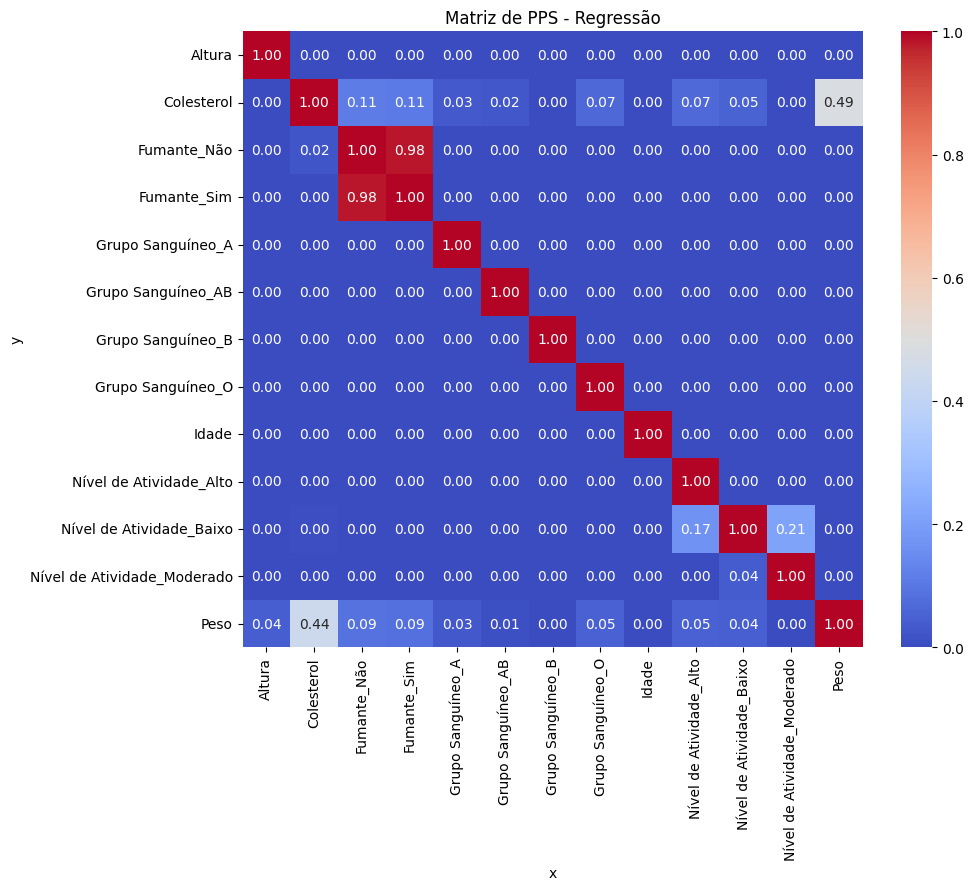

In [162]:
# Plotar a matriz de PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_reg_pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de PPS - Regressão')

In [163]:
# Calcular PPS entre duas variáveis específicas
pps.score(df, "Peso", "Colesterol")

{'x': 'Peso',
 'y': 'Colesterol',
 'ppscore': 0.48764875640467154,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 40.1725,
 'model_score': 20.58243033333333,
 'model': DecisionTreeRegressor()}

# Matriz de correlação - Regressão

In [164]:
# Calcular a matriz de correlação
corr_matrix_reg = df.corr()
corr_matrix_reg

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Idade,1.000000,-0.004836,0.007418,-0.016691,0.051285,-0.057625,0.020928,-0.008157,-0.007813,0.012542,0.065066,-0.002413,-0.052569
Peso,-0.004836,1.000000,0.378155,0.915515,0.213850,0.132618,-0.052695,-0.280983,-0.382697,0.378228,-0.278456,0.287138,-0.041172
Altura,0.007418,0.378155,1.000000,0.013552,-0.003785,-0.049504,0.024671,0.030653,0.001502,-0.003229,-0.016319,0.037064,-0.021331
Colesterol,-0.016691,0.915515,0.013552,1.000000,0.219684,0.181817,-0.072996,-0.317007,-0.425616,0.422522,-0.303478,0.302912,-0.035186
Grupo Sanguíneo_A,0.051285,0.213850,-0.003785,0.219684,1.000000,-0.364254,-0.241879,-0.415815,-0.069629,0.064101,-0.098421,0.058051,0.028362
Grupo Sanguíneo_AB,-0.057625,0.132618,-0.049504,0.181817,-0.364254,1.000000,-0.243118,-0.417945,-0.098763,0.102701,-0.065431,0.072286,-0.014138
Grupo Sanguíneo_B,0.020928,-0.052695,0.024671,-0.072996,-0.241879,-0.243118,1.000000,-0.277532,0.037686,-0.041249,0.046719,-0.048016,0.009973
Grupo Sanguíneo_O,-0.008157,-0.280983,0.030653,-0.317007,-0.415815,-0.417945,-0.277532,1.000000,0.129350,-0.125270,0.120834,-0.084753,-0.024565
Fumante_Não,-0.007813,-0.382697,0.001502,-0.425616,-0.069629,-0.098763,0.037686,0.129350,1.000000,-0.993568,0.122800,-0.145870,0.040607
Fumante_Sim,0.012542,0.378228,-0.003229,0.422522,0.064101,0.102701,-0.041249,-0.125270,-0.993568,1.000000,-0.123869,0.147287,-0.036619


Text(0.5, 1.0, 'Matriz de Correlação - Regressão')

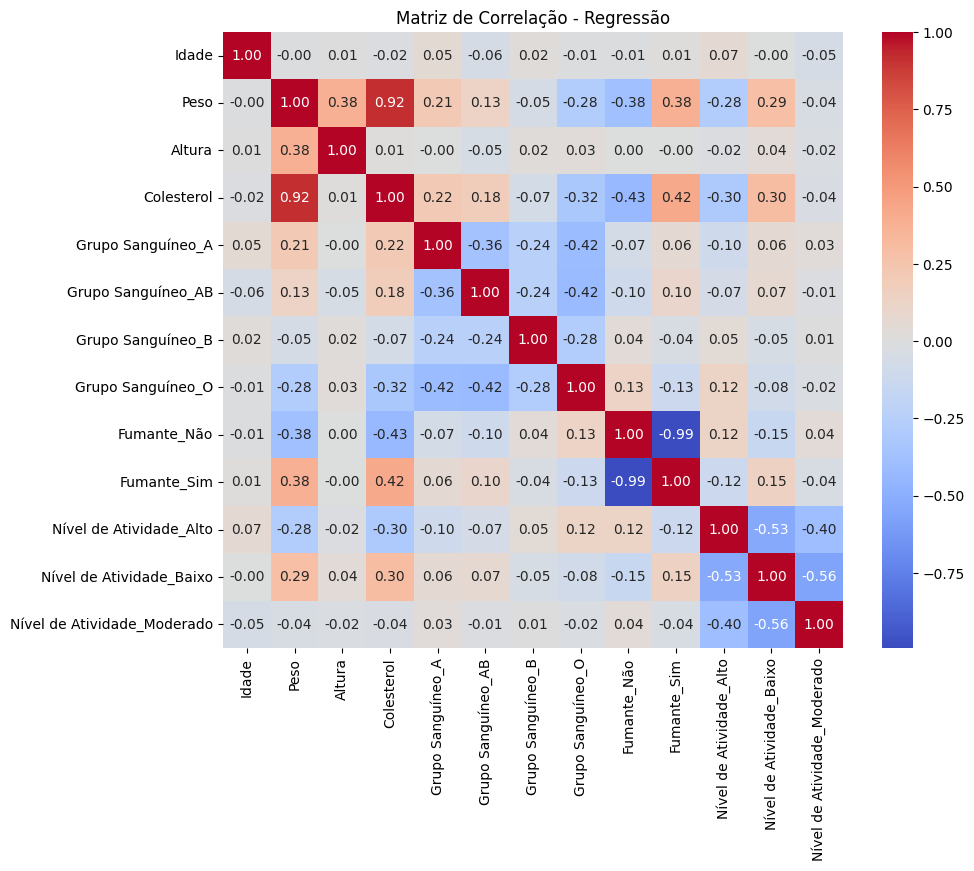

In [165]:
# Plotar matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reg, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação - Regressão')

# Treinar modelo linear - Regressão

In [166]:
# Separar X e Y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [167]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   float64
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   float64
 3   Grupo Sanguíneo_A            1000 non-null   uint8  
 4   Grupo Sanguíneo_AB           1000 non-null   uint8  
 5   Grupo Sanguíneo_B            1000 non-null   uint8  
 6   Grupo Sanguíneo_O            1000 non-null   uint8  
 7   Fumante_Não                  1000 non-null   uint8  
 8   Fumante_Sim                  1000 non-null   uint8  
 9   Nível de Atividade_Alto      1000 non-null   uint8  
 10  Nível de Atividade_Baixo     1000 non-null   uint8  
 11  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(3), uint8(9)
memory usage: 32.4 KB


In [168]:
# Treinar modelo de regressão linear múltipla
model_reg = LinearRegression()
model_reg.fit(X, y)

LinearRegression()

Text(0.5, 1.0, 'Importância das Features - Regressão')

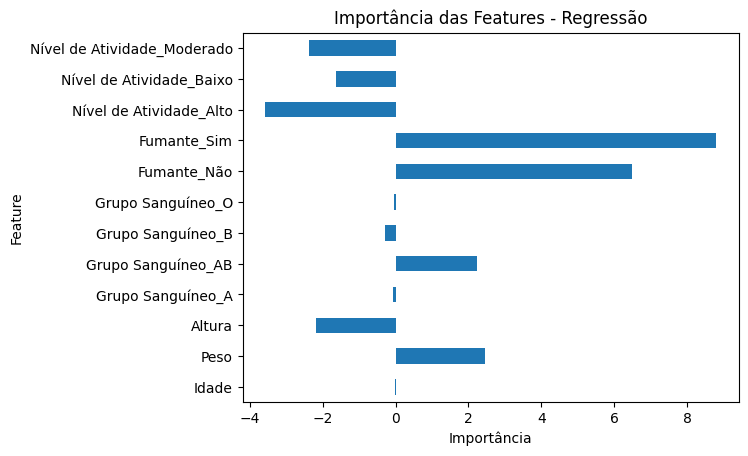

In [169]:
# Avaliar a importância das features com base nos coeficientes do modelo
feat_importances_class = pd.Series(model_reg.coef_, index=X.columns)
feat_importances_class.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features - Regressão')

# Carregar e preparar dados - Classificação

In [170]:
# Carregar o dataset
df_fruit = pd.read_csv('datasets/fruit_quality.csv')

In [171]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [172]:
# Ajustar o DF
df_fruit.drop('A_id', axis=1, inplace=True)

# Converter valor da variável Quality para numérica (bad=0, good=1)
df_fruit['Quality'] = df_fruit['Quality'].map({'bad': 0, 'good': 1})

In [173]:
df_fruit.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


# Calcular PPS - Classificação

In [174]:
# Calcular PPS entre as variáveis
pps_matrix_class = pps.matrix(df_fruit)
pps_matrix_class

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Size,Size,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Size,Weight,0.000000,regression,True,mean absolute error,1.255674,1.814665,DecisionTreeRegressor()
2,Size,Sweetness,0.000000,regression,True,mean absolute error,1.536197,2.078989,DecisionTreeRegressor()
3,Size,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.538555,DecisionTreeRegressor()
4,Size,Juiciness,0.000000,regression,True,mean absolute error,1.542205,2.160981,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
59,Quality,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.096059,DecisionTreeRegressor()
60,Quality,Juiciness,0.037673,regression,True,mean absolute error,1.542205,1.484105,DecisionTreeRegressor()
61,Quality,Ripeness,0.027576,regression,True,mean absolute error,1.491283,1.450159,DecisionTreeRegressor()
62,Quality,Acidity,0.000000,regression,True,mean absolute error,1.689354,1.690692,DecisionTreeRegressor()


In [175]:
# Ajustar a matriz para fazer o plot
pps_matrix_class_pivot = pps_matrix_class[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
pps_matrix_class_pivot

x,Acidity,Crunchiness,Juiciness,Quality,Ripeness,Size,Sweetness,Weight
y,,,,,,,,
Acidity,1.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Crunchiness,0.0,1.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Juiciness,0.0,0.000000,1.0000,0.037673,0.00000,0.000000,0.000000,0.000000
Quality,0.0,0.053106,0.1002,1.000000,0.09018,0.035822,0.086172,0.043337
Ripeness,0.0,0.000000,0.0000,0.027576,1.00000,0.000000,0.000000,0.000000
Size,0.0,0.000000,0.0000,0.034400,0.00000,1.000000,0.000000,0.000000
Sweetness,0.0,0.000000,0.0000,0.023585,0.00000,0.000000,1.000000,0.000000
Weight,0.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,1.000000


Text(0.5, 1.0, 'Matriz de PPS - Classificação')

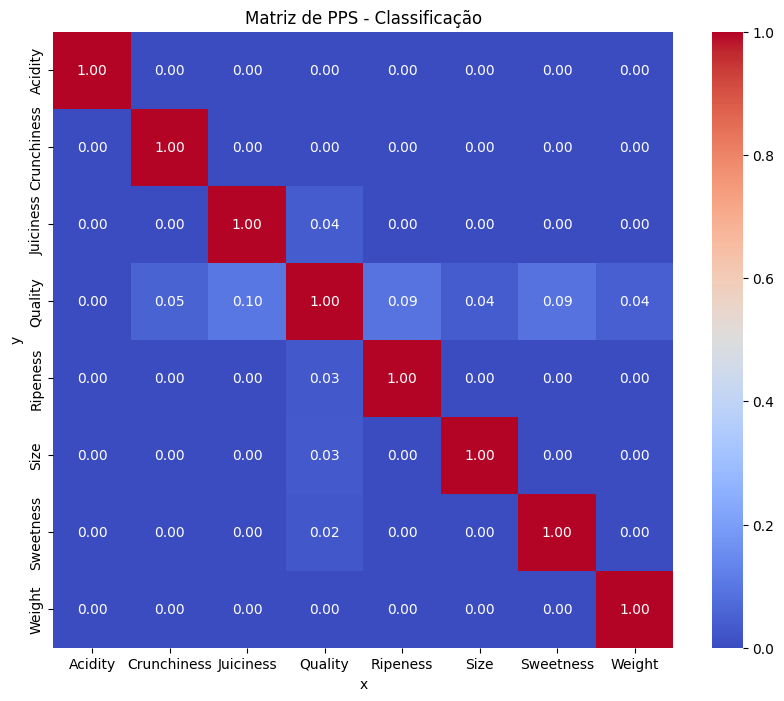

In [176]:
# Plotar a matriz de PPS
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_class_pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de PPS - Classificação')

In [177]:
# Calcular PPS entre duas variáveis específicas
pps.score(df_fruit, "Size", "Quality")

{'x': 'Size',
 'y': 'Quality',
 'ppscore': 0.035821643286573224,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.499,
 'model_score': 0.48112499999999997,
 'model': DecisionTreeRegressor()}

# Matriz de correlação - Classificação

In [178]:
# Calcular a matriz de correlação
corr_matrix_class = df_fruit.corr()
corr_matrix_class

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


Text(0.5, 1.0, 'Matriz de Correlação - Classificação')

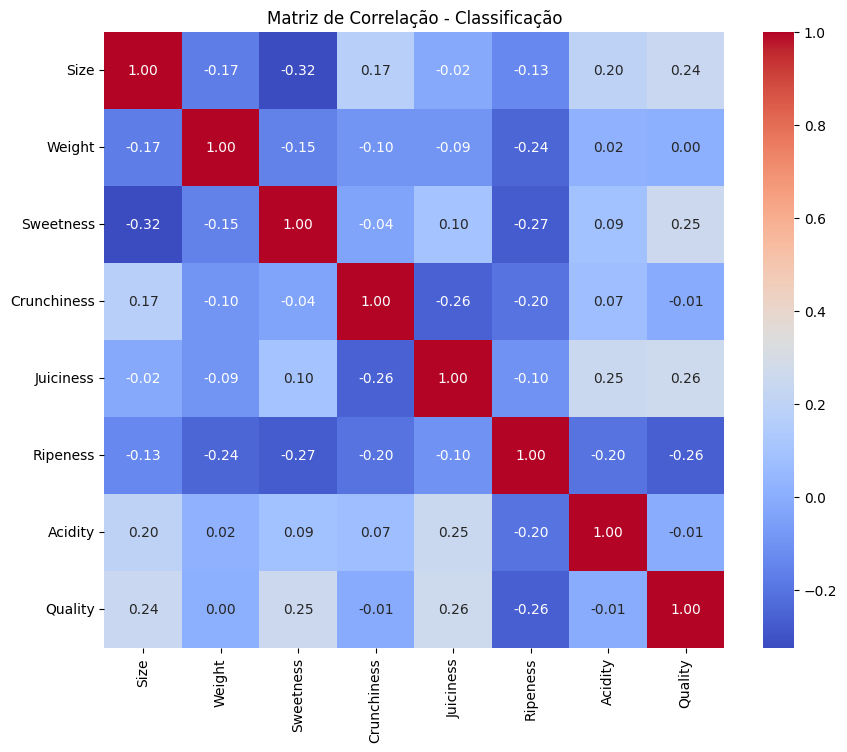

In [179]:
# Plotar matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_class, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação - Classificação')

# Treinar modelo linear - Classificação

In [180]:
# Separar X e Y
X = df_fruit.drop('Quality', axis=1)
y = df_fruit['Quality']

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
dtypes: float64(7)
memory usage: 218.9 KB


In [182]:
# Treinar modelo de regressão linear múltipla
model_class = LogisticRegression()
model_class.fit(X, y)

LogisticRegression()

Text(0.5, 1.0, 'Importância das Features - Classificação')

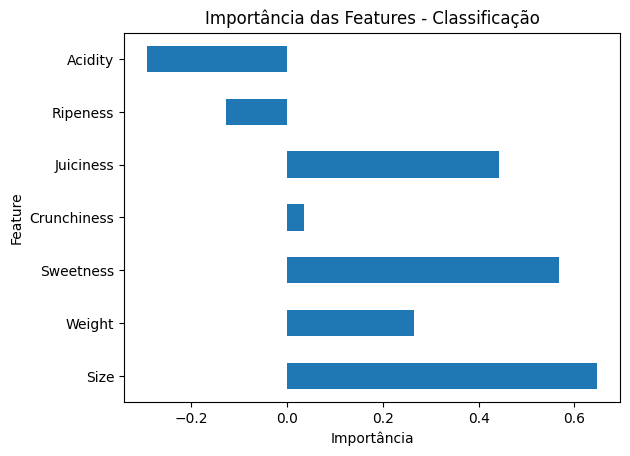

In [184]:
# Avaliar a importância das features com base nos coeficientes do modelo
feat_importances_class = pd.Series(model_class.coef_[0], index=X.columns)
feat_importances_class.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features - Classificação')